# Stock Market Analysis 

We'll be analyzing stock data related to a few car companies, from Jan 2012 to present day. This project is based on the capstone project from 'Python for finance' by Jose Portilla.  

### Part 0: Import


In [1]:
#Mushfiqur Rahman [Mushfiq]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

____
## Part 1: Getting the Data

### Tesla Stock (Ticker: TSLA on the NASDAQ)


In [2]:
import datetime

In [3]:
import pandas_datareader.data as web

In [4]:
start = datetime.datetime(2012, 1, 3)
end = datetime.date.today()
tesla = web.DataReader("TSLA", 'morningstar', start, end)

In [5]:
tesla = tesla.loc['TSLA']

In [6]:
tesla.head()

,Close,High,Low,Open,Volume
Date,,,,,
2012-01-03,28.08,29.50,27.65,28.94,928052
2012-01-04,27.71,28.67,27.50,28.21,630036
2012-01-05,27.12,27.93,26.85,27.76,1005432
2012-01-06,26.91,27.79,26.41,27.20,986287
2012-01-09,27.25,27.49,26.12,27.00,896951


In [7]:
tesla.to_csv('Tesla_Stock.csv')

### Other Car Companies

** Repeat the same steps to grab data for Ford and GM (General Motors), **

In [8]:
ford = web.DataReader("F", 'morningstar', start, end)
ford = ford.loc['F']
gm = web.DataReader("GM", 'morningstar', start, end)
gm = gm.loc['GM']

In [9]:
ford.head()

,Close,High,Low,Open,Volume
Date,,,,,
2012-01-03,11.13,11.25,10.99,11.00,45709811
2012-01-04,11.30,11.53,11.07,11.15,79725188
2012-01-05,11.59,11.63,11.24,11.33,67877467
2012-01-06,11.71,11.80,11.52,11.74,59840605
2012-01-09,11.80,11.95,11.70,11.83,53981467


In [10]:
ford.to_csv('Ford_stock.csv')

In [11]:
gm.head()

,Close,High,Low,Open,Volume
Date,,,,,
2012-01-03,21.05,21.18,20.75,20.83,9321420
2012-01-04,21.15,21.37,20.75,21.05,7856752
2012-01-05,22.17,22.29,20.96,21.10,17884040
2012-01-06,22.92,23.03,22.24,22.26,18234608
2012-01-09,22.84,23.43,22.70,23.20,12091714


In [12]:
gm.to_csv('Gm_stock.csv')

## Part 2: Visualizing the Data

** Time to visualize the data. **

** Follow along and recreate the plots below according to the instructions and explanations. **

____

** Recreate this linear plot of all the stocks' Open price ! Hint: For the legend, use label parameter and plt.legend()**

In [13]:
# Code Here

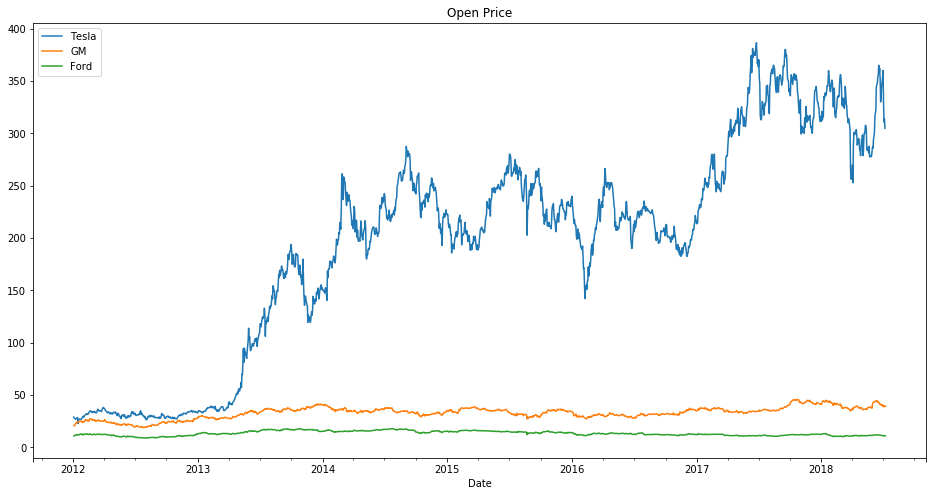

In [14]:
tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Open Price')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()


____

** Plot the Volume of stock traded each day.**

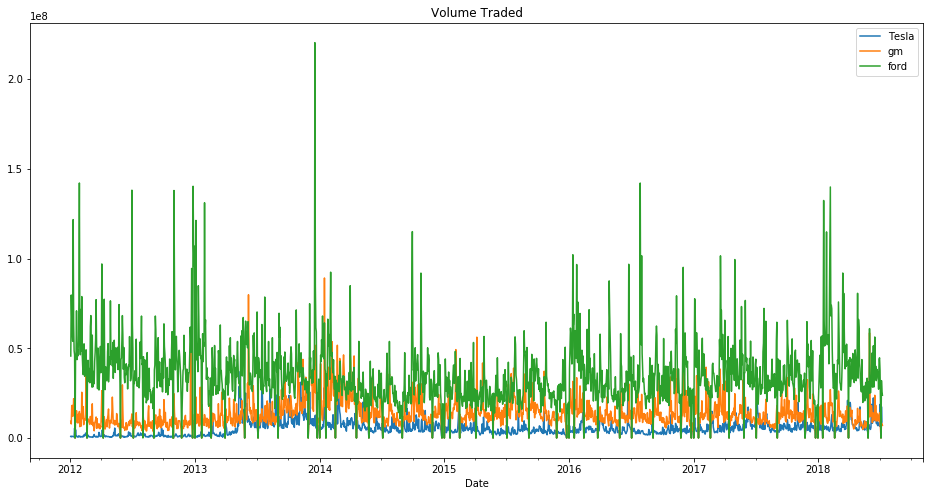

In [15]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='gm')
ford['Volume'].plot(label='ford')
plt.legend()

** Interesting, looks like Ford had a really big spike somewhere in late 2013. What was the date of this maximum trading volume for Ford?**


In [16]:
ford['Volume'].idxmax()

Timestamp('2013-12-18 00:00:00')

The reason for volume volume spike:

http://money.cnn.com/2013/12/18/news/companies/ford-profit/ <br/>
https://www.usatoday.com/story/money/cars/2013/12/18/ford-2014-profit-warning/4110015/ <br/>
https://media.ford.com/content/dam/fordmedia/North%20America/US/2014/01/28/4QFinancials.pdf


____

** The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \$10 each versus 100000 units of stock at $1 each)**

** Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.**

In [17]:
# Code Here 

In [18]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

** Plot this "Total Traded" against the time index.**

In [19]:
# Code here

Text(0,0.5,'Total Traded')

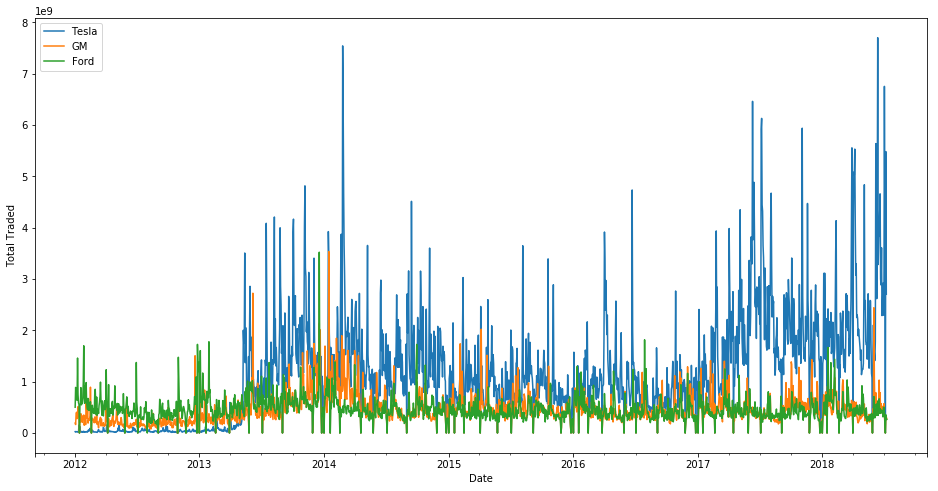

In [20]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend()
plt.ylabel('Total Traded')

** Interesting, looks like there was huge amount of money traded for Tesla somewhere in early 2014. What date was that and what happened? **

In [21]:
tesla['Total Traded'].idxmax()

Timestamp('2018-06-12 00:00:00')

 http://money.cnn.com/2014/02/25/investing/tesla-record-high/ <br/>
 https://blogs.wsj.com/moneybeat/2014/02/25/tesla-shares-surge-on-morgan-stanley-report/ <br/>
 https://www.washingtonpost.com/news/wonk/wp/2014/02/25/teslas-stock-is-up-644-why-it-may-not-last/ <br/>
 http://www.cnbc.com/2014/02/25/tesla-soars-ford-falls-in-consumer-reports-study.html

____

** Plot out the MA50 and MA200 for GM. **

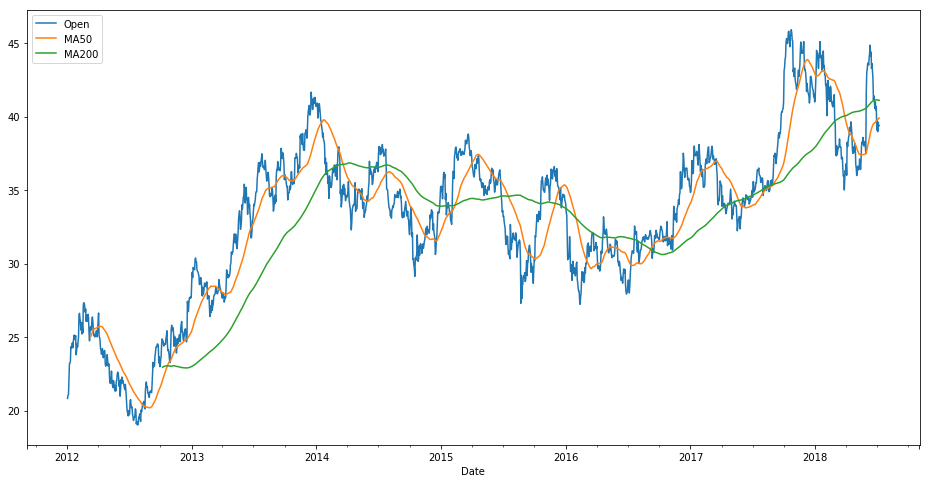

In [22]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(label='gm',figsize=(16,8))

______

** Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can see this easily through a scatter matrix plot. Import scatter_matrix from pandas.plotting and use it to create a scatter matrix plot of all the stocks'opening price. You may need to rearrange the columns into a new single dataframe. Hints and info can be found here: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot **

In [23]:
from pandas.plotting import scatter_matrix

In [24]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)

In [25]:
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

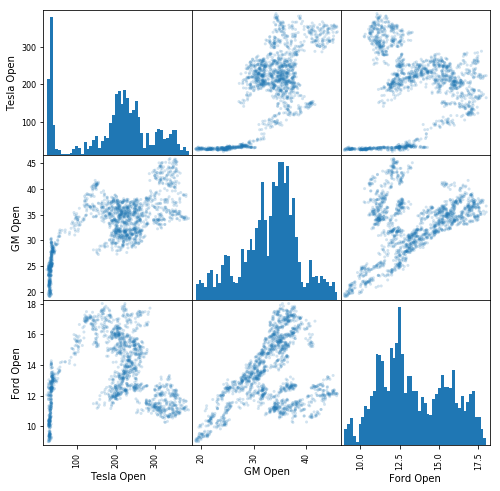

In [26]:
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

## Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

** Create a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, or you can also use pandas' built in pct_change method. **

In [27]:
#using shift

In [28]:
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) ) - 1

In [29]:
tesla.head()

,Close,High,Low,Open,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,28.08,29.50,27.65,28.94,928052,26857824.88,NaN
2012-01-04,27.71,28.67,27.50,28.21,630036,17773315.56,-0.013177
2012-01-05,27.12,27.93,26.85,27.76,1005432,27910792.32,-0.021292
2012-01-06,26.91,27.79,26.41,27.20,986287,26827006.40,-0.007743
2012-01-09,27.25,27.49,26.12,27.00,896951,24217677.00,0.012635


In [30]:
#using pandas percent change
tesla['returns'] = tesla['Close'].pct_change(1)

In [31]:
tesla.head()

,Close,High,Low,Open,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,28.08,29.50,27.65,28.94,928052,26857824.88,NaN
2012-01-04,27.71,28.67,27.50,28.21,630036,17773315.56,-0.013177
2012-01-05,27.12,27.93,26.85,27.76,1005432,27910792.32,-0.021292
2012-01-06,26.91,27.79,26.41,27.20,986287,26827006.40,-0.007743
2012-01-09,27.25,27.49,26.12,27.00,896951,24217677.00,0.012635


In [32]:
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

In [33]:
ford.head()

,Close,High,Low,Open,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,11.13,11.25,10.99,11.00,45709811,5.028079e+08,NaN
2012-01-04,11.30,11.53,11.07,11.15,79725188,8.889358e+08,0.015274
2012-01-05,11.59,11.63,11.24,11.33,67877467,7.690517e+08,0.025664
2012-01-06,11.71,11.80,11.52,11.74,59840605,7.025287e+08,0.010354
2012-01-09,11.80,11.95,11.70,11.83,53981467,6.386008e+08,0.007686


In [34]:
gm.head()

,Close,High,Low,Open,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,
2012-01-03,21.05,21.18,20.75,20.83,9321420,1.941652e+08,NaN,NaN,NaN
2012-01-04,21.15,21.37,20.75,21.05,7856752,1.653846e+08,NaN,NaN,0.004751
2012-01-05,22.17,22.29,20.96,21.10,17884040,3.773532e+08,NaN,NaN,0.048227
2012-01-06,22.92,23.03,22.24,22.26,18234608,4.059024e+08,NaN,NaN,0.033829
2012-01-09,22.84,23.43,22.70,23.20,12091714,2.805278e+08,NaN,NaN,-0.003490


In [35]:
gm = gm.drop(['MA50', 'MA200'], axis = 1)

In [36]:
gm.head()

,Close,High,Low,Open,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,21.05,21.18,20.75,20.83,9321420,1.941652e+08,NaN
2012-01-04,21.15,21.37,20.75,21.05,7856752,1.653846e+08,0.004751
2012-01-05,22.17,22.29,20.96,21.10,17884040,3.773532e+08,0.048227
2012-01-06,22.92,23.03,22.24,22.26,18234608,4.059024e+08,0.033829
2012-01-09,22.84,23.43,22.70,23.20,12091714,2.805278e+08,-0.003490


** Now plot a histogram of each companies returns. Either do them separately, or stack them on top of each other. Which stock is the most "volatile"? (as judged by the variance in the daily returns we will discuss volatility in a lot more detail in future lectures.)**

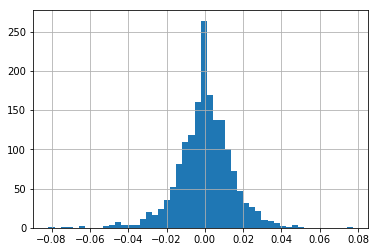

In [37]:
ford['returns'].hist(bins=50)

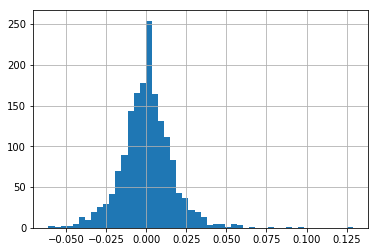

In [38]:
gm['returns'].hist(bins=50)

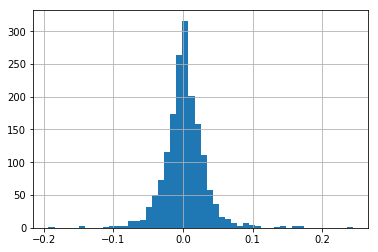

In [39]:
tesla['returns'].hist(bins=50)

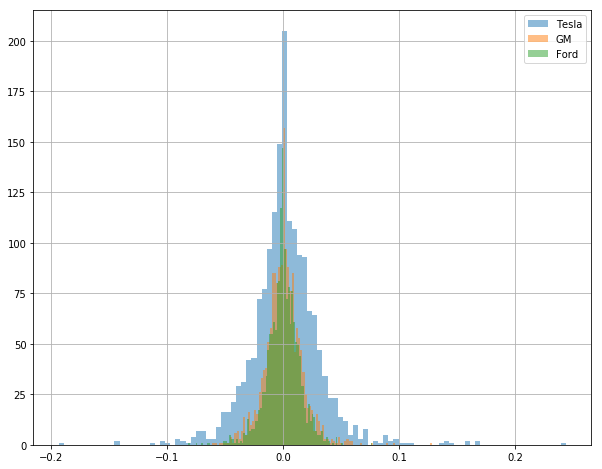

In [40]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

** Try also plotting a KDE instead of histograms for another view point. Which stock has the widest plot? **

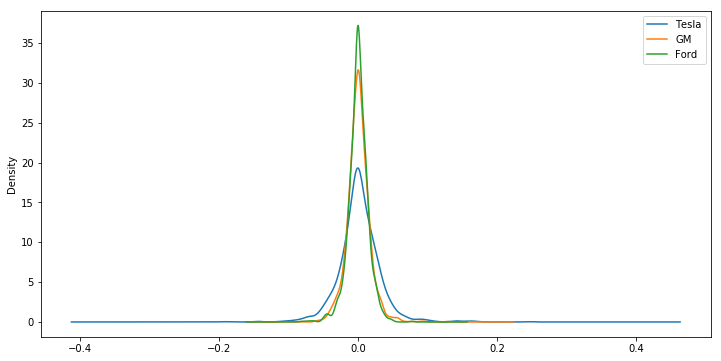

In [41]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend()

** Try also creating some box plots comparing the returns. **

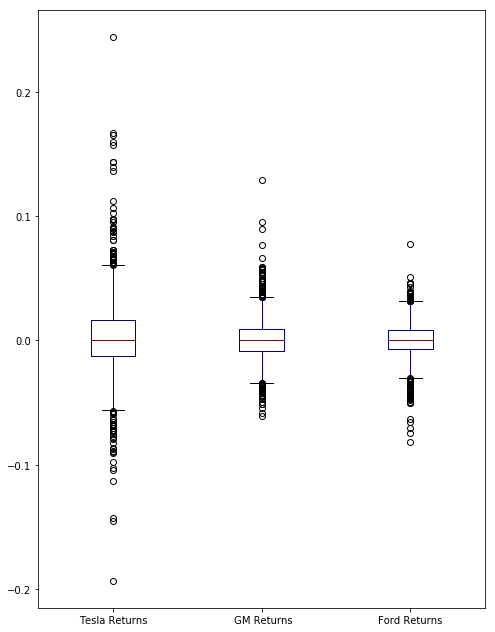

In [42]:
box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns = ['Tesla Returns',' GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

## Comparing Daily Returns between Stocks

** Create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?**

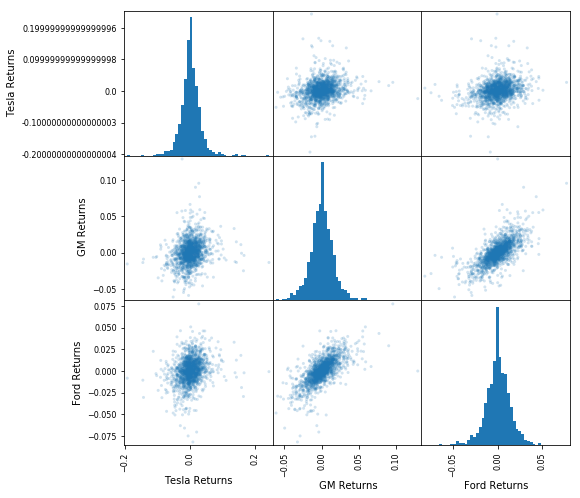

In [43]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

** It looks like Ford and GM do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely!**

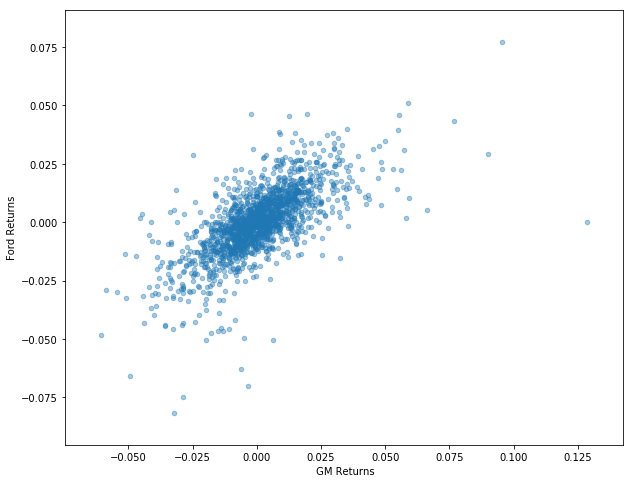

In [44]:
box_df.plot(kind='scatter',x=' GM Returns',y='Ford Returns',alpha=0.4,figsize=(10,8))

____
## Cumulative Daily Returns

Great! Now we can see which stock was the most wide ranging in daily returns (you should have realized it was Tesla, our original stock price plot should have also made that obvious).

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

** Create a cumulative daily return column for each car company's dataframe.**

In [45]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()

In [46]:
tesla.head()

,Close,High,Low,Open,Volume,Total Traded,returns,Cumulative Return
Date,,,,,,,,
2012-01-03,28.08,29.50,27.65,28.94,928052,26857824.88,NaN,NaN
2012-01-04,27.71,28.67,27.50,28.21,630036,17773315.56,-0.013177,0.986823
2012-01-05,27.12,27.93,26.85,27.76,1005432,27910792.32,-0.021292,0.965812
2012-01-06,26.91,27.79,26.41,27.20,986287,26827006.40,-0.007743,0.958333
2012-01-09,27.25,27.49,26.12,27.00,896951,24217677.00,0.012635,0.970442


In [47]:
tesla.tail()

,Close,High,Low,Open,Volume,Total Traded,returns,Cumulative Return
Date,,,,,,,,
2018-07-02,335.07,364.78,329.85,360.0700,18759765,6.754829e+09,-0.022977,11.932692
2018-07-03,310.86,332.49,309.69,331.7500,12282638,4.074765e+09,-0.072254,11.070513
2018-07-04,310.86,310.86,310.86,310.8600,0,0.000000e+00,0.000000,11.070513
2018-07-05,309.16,314.39,296.22,313.7600,17476374,5.483387e+09,-0.005469,11.009972
2018-07-06,308.90,312.07,302.00,304.9545,8865451,2.703559e+09,-0.000841,11.000712


In [48]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

** Now plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?**

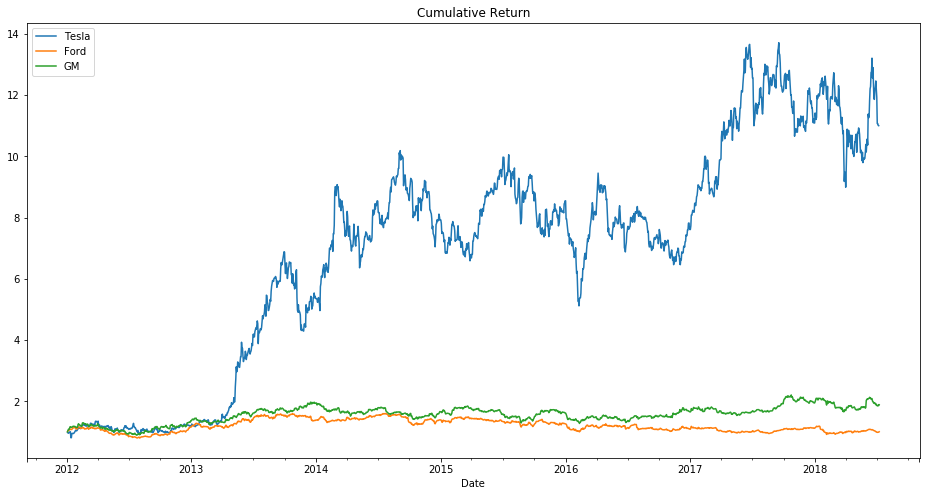

In [49]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()